### Data Science Project
By Afnan Alabdan

## Content outline

1. [Introduction](#intro)
2. [Extract, Transform and load Data](#ETL) 
3. [Data Preparation and Analysis](#DA)
4. [Developing Classification Models](#ML)
5. [Conclusion](#conc)

# Introduction <a id="intro"></a>

This project aims to develop classification models for term deposits using data from <b>Greene City National Bank (GCNB)</b>. The data is spread across different files and databases, including four main tables: Users, User Devices, User Transaction History, and Consumer Loan Complaints.Throughout the project, we'll follow a comprehensive data science approach, including data cleaning, exploratory data analysis, visualization, and machine learning model development. Our goal is to build machine learning models to predict which customers are most likely to sign up for a term deposit, aiding GCNB in developing effective marketing campaigns and generating more revenue for achieving its business goals. 

# Import software libraries

In [1]:
import sys           # Read system parameters.
import numpy as np   # Work with multi-dimensional arrays.
import pandas as pd  # Manipulate and analyze data.
import sqlite3       # Manage SQL databases.
import scipy as sp                                          # Apply advanced mathematical functions.
from scipy import stats
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce # Encode data.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV, \
                                    StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics  import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            RocCurveDisplay, \
                            PrecisionRecallDisplay, \
                            ConfusionMatrixDisplay


from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
import pickle      
from sklearn.pipeline import Pipeline
from collections import Counter                             # Count objects in containers.
import warnings
warnings.filterwarnings('ignore')



# Ensure results are reproducible.
np.random.seed(1)



# Extract, Transform and load Data <a id="ETL"></a>

## Load a CSV file as a `DataFrame`

In [2]:
complaints_data = pd.read_csv('C://Users//Afnan//Desktop//Data//CNX0011Data//ETL//data//consumer_loan_complaints.csv')

## Preview the first three rows of the data

In [3]:
complaints_data.head(n = 3)

,user_id,Date received,Product,Issue,Consumer complaint narrative,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,44fefdad-7045-4be5-890e-12e84ae6fdc9,01/27/2016,Consumer Loan,Account terms and changes,NaN,AL,35180,Phone,01/27/2016,Closed with explanation,Yes,No,1760486
1,c49d5d60-909f-406b-b7ff-51143fcb650b,08/26/2014,Consumer Loan,Account terms and changes,NaN,NC,278XX,Phone,08/29/2014,Closed with non-monetary relief,Yes,No,1001740
2,9b2cd5d2-900e-4052-831f-6489f6d568af,08/22/2012,Consumer Loan,Account terms and changes,NaN,TN,37205,Referral,08/23/2012,Closed with non-monetary relief,Yes,No,140039


## Create a connection to the SQLite database

In [4]:
conn = sqlite3.connect('C://Users//Afnan//Desktop//Data//CNX0011Data//ETL//data//user_data.db')
conn

## Read the `users` data

In [5]:
# Write a query that selects everything from the users table.

query = 'SELECT * FROM users'

In [6]:
# Read the query into a DataFrame.

users = pd.read_sql(query, conn)

# Preview the data.

users.head()

,user_id,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,58,management,married,tertiary,no,yes,no,None,261,1,-1,0,None,no,1998-08-23
1,bb92765a-08de-4963-b432-496524b39157,44,technician,single,secondary,no,yes,no,None,151,1,-1,0,None,no,2008-07-15
2,573de577-49ef-42b9-83da-d3cfb817b5c1,33,entrepreneur,married,secondary,no,yes,yes,None,76,1,-1,0,None,no,2002-06-04
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,47,blue-collar,married,None,no,yes,no,None,92,1,-1,0,None,no,1995-06-29
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,33,None,single,None,no,no,no,None,198,1,-1,0,None,no,1995-08-01


In [7]:
# Check the shape of the data.

users.shape

(45216, 16)

## Read the `device` data

In [8]:
query = 'SELECT * FROM device'

device = pd.read_sql(query, conn)

device.head()

,user_id,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,mobile
1,bb92765a-08de-4963-b432-496524b39157,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,mobile


In [9]:
device.shape

(45117, 2)

## Read the `transactions` data

In [10]:
# Read the user transactions in the last 30 days. 

query = 'SELECT * FROM transactions'

transactions = pd.read_sql(query, conn)

transactions.head()

,user_id,transaction_id,amount_usd
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,transaction_5180,1332
1,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,transaction_5607,726
2,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,transaction_6765,85
3,573de577-49ef-42b9-83da-d3cfb817b5c1,transaction_6170,1
4,573de577-49ef-42b9-83da-d3cfb817b5c1,transaction_6090,1


In [11]:
transactions.shape

(140034, 3)

## Aggregate the transactions data

In [12]:
# Aggregate data on the number of transactions and the total amount.

query = '''SELECT user_id, 
                  COUNT(*) AS number_transactions, 
                  SUM(amount_usd) AS total_amount_usd 
           FROM transactions 
           GROUP BY user_id'''

transactions_agg = pd.read_sql(query, conn)

transactions_agg.head()

,user_id,number_transactions,total_amount_usd
0,0001570d-8aed-465e-b547-8981651084ed,3,792
1,000548ed-aa18-4eef-b8ed-68a9126e33ab,2,1044
2,00069959-4d55-460e-bb76-ae13ddbd80a6,5,0
3,000bab00-aec4-4ee2-81a6-1f897c38726b,19,0
4,000cbac8-212f-46fb-b58f-861dada34284,2,399


In [13]:
transactions_agg.shape

(35211, 3)

we've extracted all of the relevant data from each source. The data tables currently live in separate objects, but they share a common key: user_id. Instead of keeping them all separate, we'll begin consolidating them using this primary key so they end up as a single table. In particular, we'll create a master table that includes user demographics, banking information, device usage, and transaction history. Having this master table will make many forthcoming data science tasks easier

## Merge the device table with the users table

In [14]:
# Do a left join, as all users in the users table are of interest.

query = '''SELECT left_table.*,           
                  right_table.device       
           FROM users AS left_table         
           LEFT JOIN device AS right_table   
             ON left_table.user_id = right_table.user_id'''

users_w_device = pd.read_sql(query, conn)

In [15]:
users_w_device.head(n = 3)

,user_id,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,58,management,married,tertiary,no,yes,no,None,261,1,-1,0,None,no,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,44,technician,single,secondary,no,yes,no,None,151,1,-1,0,None,no,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,33,entrepreneur,married,secondary,no,yes,yes,None,76,1,-1,0,None,no,2002-06-04,mobile


In [16]:
users_w_device.shape

(45216, 17)

## Close the database connection

In [17]:
conn.close()

## Merge users_w_device with transactions_agg

we're creating a new DataFrame that will merge the aggregated transactions data with the combined users and devices table. 

In [18]:
# Do a right join so users won't be lost.

users_w_devices_and_transactions = \
transactions_agg.merge(users_w_device,
                       on = 'user_id', how = 'right')

users_w_devices_and_transactions.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,no,yes,no,None,261,1,-1,0,None,no,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,no,yes,no,None,151,1,-1,0,None,no,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,no,yes,yes,None,76,1,-1,0,None,no,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,no,yes,no,None,92,1,-1,0,None,no,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,no,no,no,None,198,1,-1,0,None,no,1995-08-01,mobile


In [19]:
# Make sure number of rows is equal to users_w_devices table.

users_w_devices_and_transactions.shape

(45216, 19)

## Identify data where `age` is greater than 150

In [20]:
users_w_devices_and_transactions[users_w_devices_and_transactions.age > 150]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
7228,44fefdad-7045-4be5-890e-12e84ae6fdc9,NaN,NaN,178,blue-collar,married,primary,no,yes,no,None,691,1,-1,0,None,no,1997-04-28,desktop
10318,9b2cd5d2-900e-4052-831f-6489f6d568af,2.0,3165.0,891,management,married,tertiary,no,yes,no,None,278,2,-1,0,None,no,2003-10-03,mobile


## Drop incorrect data

In [21]:
users_cleaned = \
users_w_devices_and_transactions[users_w_devices_and_transactions.age < 150]

users_cleaned.shape

(45214, 19)

## Identify more potentially erroneous data

In [22]:
# Compare age to device.

pd.crosstab(users_cleaned['age'], users_cleaned['device']).sample(20)

device,desktop,mobile,tablet
age,,,
49,268,588,138
61,46,91,10
44,309,683,144
93,0,2,0
76,8,19,5
77,10,30,4
79,6,18,1
69,5,34,4
54,198,506,105


The frequency table shows that younger users are much more likely to use electronic devices to do their banking than people who are 90+ years old. Since the number of devices used by these elderly users is so sparse (one to two total per age)

## Identify data types that need correcting

In [23]:
users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45214 non-null  object 
 1   number_transactions  35215 non-null  float64
 2   total_amount_usd     35215 non-null  float64
 3   age                  45214 non-null  int64  
 4   job                  44926 non-null  object 
 5   marital              45214 non-null  object 
 6   education            43357 non-null  object 
 7   default              45214 non-null  object 
 8   housing              45214 non-null  object 
 9   loan                 45214 non-null  object 
 10  contact              32196 non-null  object 
 11  duration             45214 non-null  int64  
 12  campaign             45214 non-null  int64  
 13  pdays                45214 non-null  int64  
 14  previous             45214 non-null  int64  
 15  poutcome             8255 non-null  

In [24]:
users_cleaned.default.value_counts()

no     44398
yes      816
Name: default, dtype: int64

The default variable has only "yes" or "no" values in string object form. Other variables follow this pattern, including housing, loan, and term_deposit. It would be better if these were cast as Booleans.

## Convert the relevant variables to a Boolean type

In [25]:
users_cleaned_1 = users_cleaned.copy()  # Work with a new object.

users_cleaned_1.default = \
users_cleaned_1.default.map(dict(yes = 1, no = 0)).astype(bool)

users_cleaned_1.default.value_counts()

False    44398
True       816
Name: default, dtype: int64

In [26]:
# Do the same for the other Boolean variables.

bool_vars = ['housing', 'loan', 'term_deposit']

for var in bool_vars:
    users_cleaned_1[var] = \
    users_cleaned_1[var].map(dict(yes = 1, no = 0)).astype(bool)

    print(f'Converted {var} to Boolean.')

Converted housing to Boolean.
Converted loan to Boolean.
Converted term_deposit to Boolean.


In [27]:
users_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45214 non-null  object 
 1   number_transactions  35215 non-null  float64
 2   total_amount_usd     35215 non-null  float64
 3   age                  45214 non-null  int64  
 4   job                  44926 non-null  object 
 5   marital              45214 non-null  object 
 6   education            43357 non-null  object 
 7   default              45214 non-null  bool   
 8   housing              45214 non-null  bool   
 9   loan                 45214 non-null  bool   
 10  contact              32196 non-null  object 
 11  duration             45214 non-null  int64  
 12  campaign             45214 non-null  int64  
 13  pdays                45214 non-null  int64  
 14  previous             45214 non-null  int64  
 15  poutcome             8255 non-null  

## Convert date_joined to a datetime format

In [28]:
users_cleaned_2 = users_cleaned_1.copy()  # Work with a new object.

users_cleaned_2['date_joined'] = \
pd.to_datetime(users_cleaned_2['date_joined'],
               format = '%Y-%m-%d')

In [29]:
users_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45214 non-null  object        
 1   number_transactions  35215 non-null  float64       
 2   total_amount_usd     35215 non-null  float64       
 3   age                  45214 non-null  int64         
 4   job                  44926 non-null  object        
 5   marital              45214 non-null  object        
 6   education            43357 non-null  object        
 7   default              45214 non-null  bool          
 8   housing              45214 non-null  bool          
 9   loan                 45214 non-null  bool          
 10  contact              32196 non-null  object        
 11  duration             45214 non-null  int64         
 12  campaign             45214 non-null  int64         
 13  pdays                45214 non-

## Identify all duplicated data

In [30]:
duplicated_data = \
users_cleaned_2[users_cleaned_2.duplicated(keep = False)]

print('Number of rows with duplicated data:',
      duplicated_data.shape[0])

Number of rows with duplicated data: 10


In [31]:
duplicated_data

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
15456,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,None,False,1993-02-27,desktop
22005,1e826721-b38c-41c2-88f4-4c28b335b1e6,4.0,159.0,31,technician,single,secondary,False,False,False,cellular,129,1,-1,0,None,False,1990-05-10,mobile
35413,a2fb8264-d55a-437b-a8e7-9ec4116b76f4,2.0,676.0,34,management,married,tertiary,False,False,False,cellular,156,1,177,1,success,False,1989-09-02,mobile
35620,f49ac08f-b872-4d57-ac82-9b8a9144020d,4.0,117.0,38,blue-collar,married,secondary,False,True,False,cellular,54,1,337,1,failure,False,2010-06-11,mobile
36292,ae3b92a2-cad8-434f-8037-9815e2228839,2.0,426.0,43,admin.,single,secondary,False,True,False,cellular,76,2,304,2,failure,False,1992-10-29,desktop
45211,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,None,False,1993-02-27,desktop
45212,1e826721-b38c-41c2-88f4-4c28b335b1e6,4.0,159.0,31,technician,single,secondary,False,False,False,cellular,129,1,-1,0,None,False,1990-05-10,mobile
45213,a2fb8264-d55a-437b-a8e7-9ec4116b76f4,2.0,676.0,34,management,married,tertiary,False,False,False,cellular,156,1,177,1,success,False,1989-09-02,mobile
45214,ae3b92a2-cad8-434f-8037-9815e2228839,2.0,426.0,43,admin.,single,secondary,False,True,False,cellular,76,2,304,2,failure,False,1992-10-29,desktop
45215,f49ac08f-b872-4d57-ac82-9b8a9144020d,4.0,117.0,38,blue-collar,married,secondary,False,True,False,cellular,54,1,337,1,failure,False,2010-06-11,mobile


## Remove the duplicated data

In [32]:
users_cleaned_final = \
users_cleaned_2[~users_cleaned_2.duplicated()]

users_cleaned_final[users_cleaned_final['user_id'] == \
'cba59442-af3c-41d7-a39c-0f9bffba0660']

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
15456,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,None,False,1993-02-27,desktop


In [33]:
users_cleaned_final.shape

(45209, 19)

# Data Preparation and Analysis <a id="DA"></a>

## Check for correlations

In [34]:
users_cleaned_final.corr().abs()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,0.163409,0.008813,0.138838,0.030429,0.075319,0.017220,0.026431,0.030751,0.023046,0.053390
total_amount_usd,0.163409,1.000000,0.095839,0.065390,0.066857,0.084526,0.022586,0.017274,0.006435,0.016952,0.050785
age,0.008813,0.095839,1.000000,0.017875,0.185552,0.015641,0.004645,0.004767,0.023745,0.001297,0.025168
default,0.138838,0.065390,0.017875,1.000000,0.006020,0.077232,0.010017,0.016819,0.029982,0.018331,0.022421
housing,0.030429,0.066857,0.185552,0.006020,1.000000,0.041341,0.005041,0.023583,0.124197,0.037087,0.139161
loan,0.075319,0.084526,0.015641,0.077232,0.041341,1.000000,0.012395,0.009972,0.022762,0.011048,0.068193
duration,0.017220,0.022586,0.004645,0.010017,0.005041,0.012395,1.000000,0.084551,0.001549,0.001213,0.394549
campaign,0.026431,0.017274,0.004767,0.016819,0.023583,0.009972,0.084551,1.000000,0.088636,0.032860,0.073179
pdays,0.030751,0.006435,0.023745,0.029982,0.124197,0.022762,0.001549,0.088636,1.000000,0.454817,0.103616
previous,0.023046,0.016952,0.001297,0.018331,0.037087,0.011048,0.001213,0.032860,0.454817,1.000000,0.093232


## Generate summary statistics 

In [35]:
users_cleaned_final.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


## Drop user ID since it's unique

In [36]:
users_cleaned_final.drop(['user_id'], axis = 1).mode()

,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,2.0,0.0,32.0,blue-collar,married,secondary,False,True,False,cellular,124.0,1.0,-1.0,0.0,failure,False,1990-07-05,mobile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-12-07,NaN


## Plot histograms for all numerical columns

In [37]:
users_data_for_hist = users_cleaned_final.select_dtypes(exclude = bool)

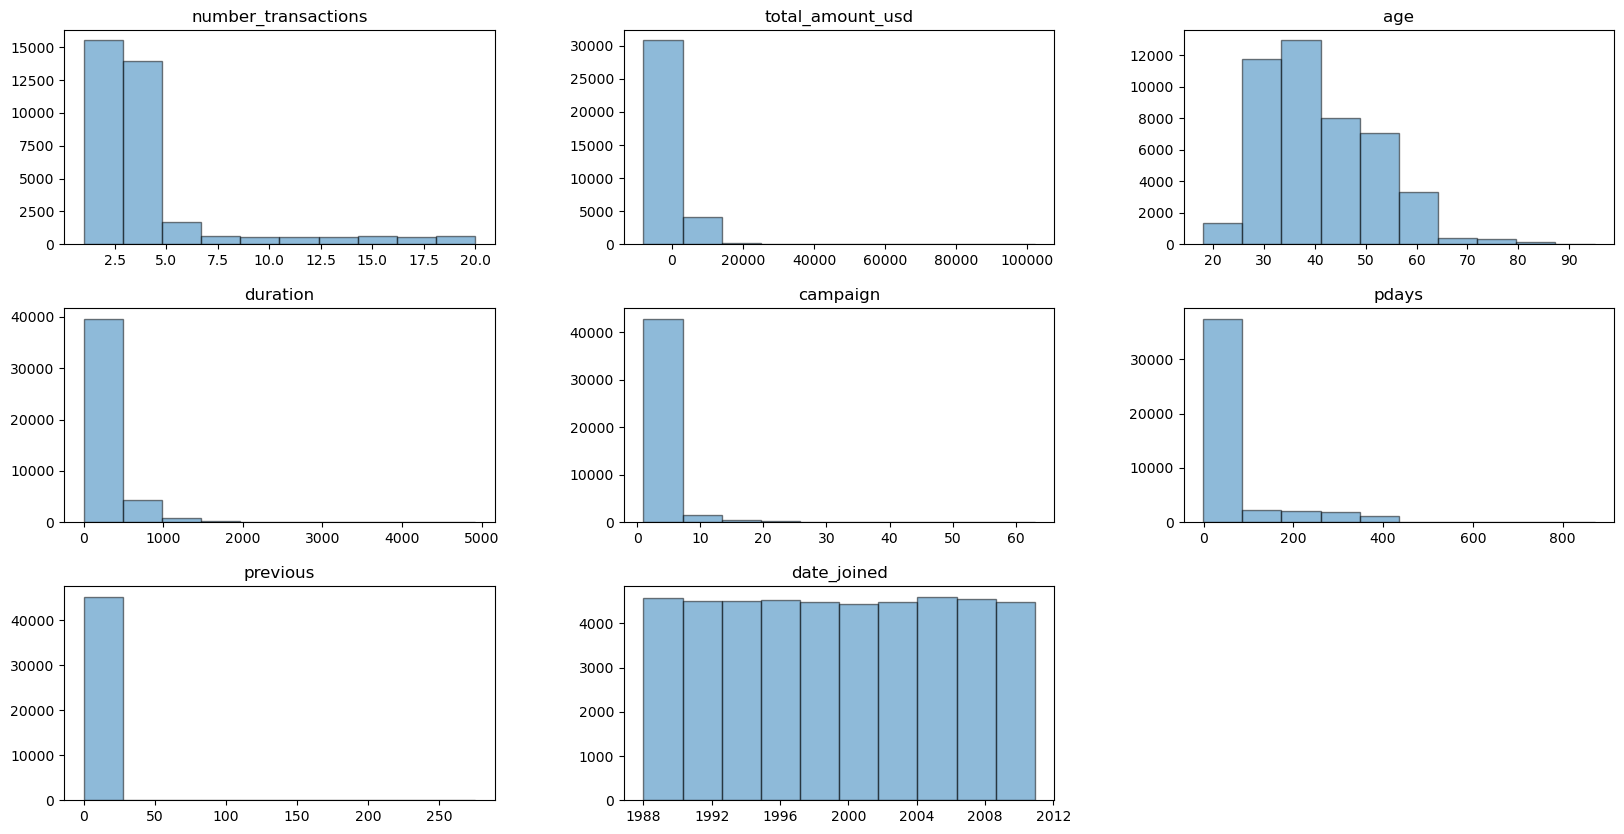

In [38]:
users_data_for_hist.hist(figsize = (20, 10), alpha = 0.5,
                         edgecolor = 'black', grid = False);

## Generate a box plot for number_transactions

In [39]:
users_cleaned_final['number_transactions'].describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

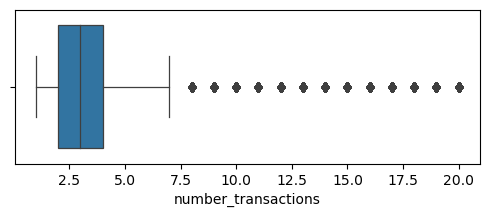

In [40]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = users_cleaned_final['number_transactions'],
            linewidth = 0.9);

## Generate scatter plots comparing total_amount_usd to number_transactions

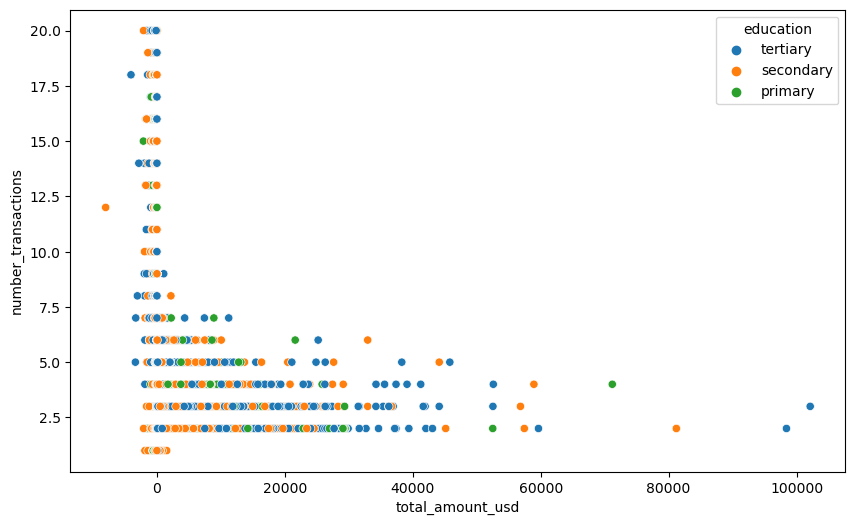

In [41]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = users_cleaned_final, x = 'total_amount_usd',
                y = 'number_transactions', hue = 'education');

## Generate a line plot for total_amount_usd

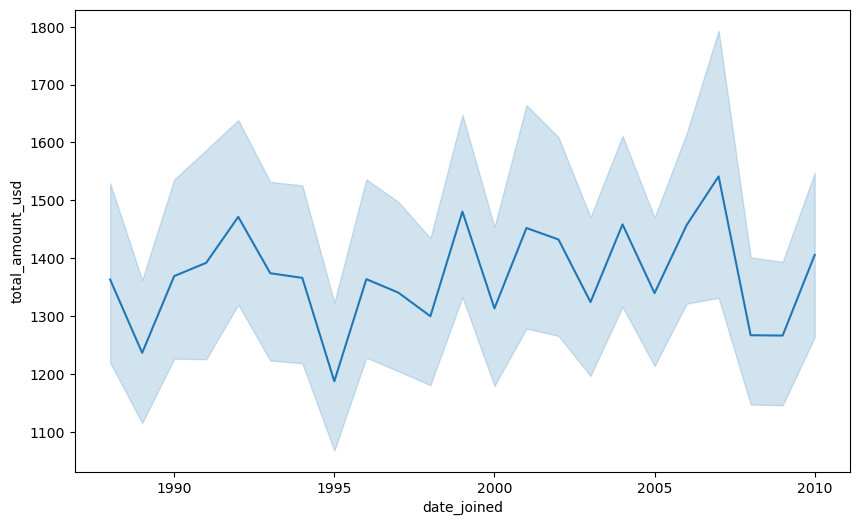

In [42]:
plt.figure(figsize = (10, 6))

years = users_cleaned_final['date_joined'].dt.year

sns.lineplot(data = users_cleaned_final, x = years,
             y = 'total_amount_usd',
             estimator = np.mean);

## Generate a bar chart for default

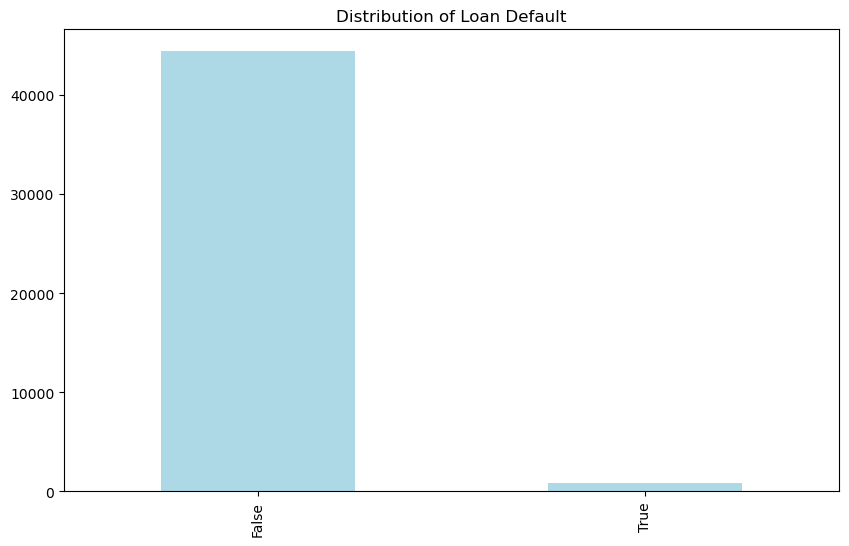

In [43]:
plt.figure(figsize = (10, 6))

users_device_dist = users_cleaned_final['default'].value_counts(dropna = False)

users_device_dist.plot(kind = 'bar', color = 'lightblue')
plt.title('Distribution of Loan Default');

## Generate a bar chart for device

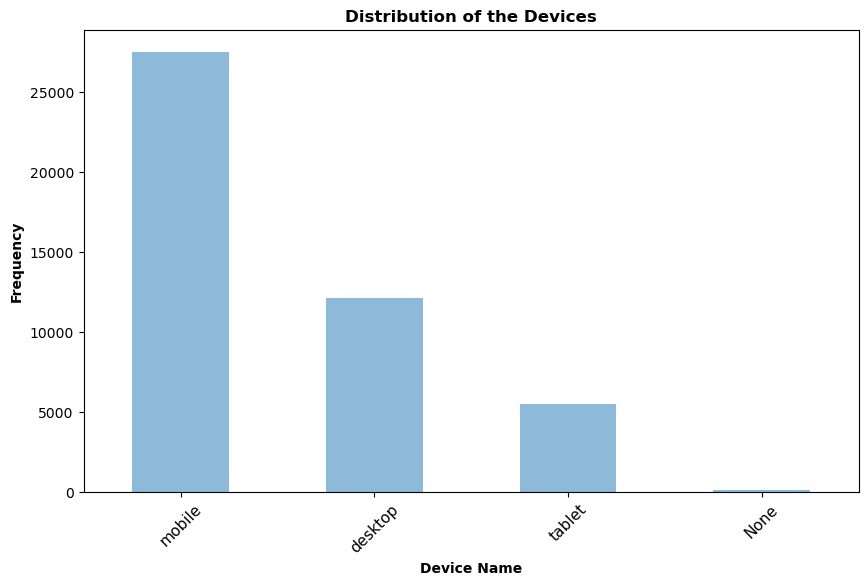

In [44]:
plt.figure(figsize = (10, 6))
users_device_dist = users_cleaned_final['device'].value_counts(dropna = False)
users_device_dist.plot(kind = 'bar',
                       alpha = 0.5,)
plt.title('Distribution of the Devices',
          size = 12, weight = 'bold')
plt.xticks(rotation = 45, size = 11)
plt.xlabel('Device Name', size = 10, weight = 'bold')
plt.ylabel('Frequency', size = 10, weight = 'bold')
plt.show();

## Generate a heatmap for the feature correlations

In [45]:
corr_matrix = users_cleaned_final.corr()

corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


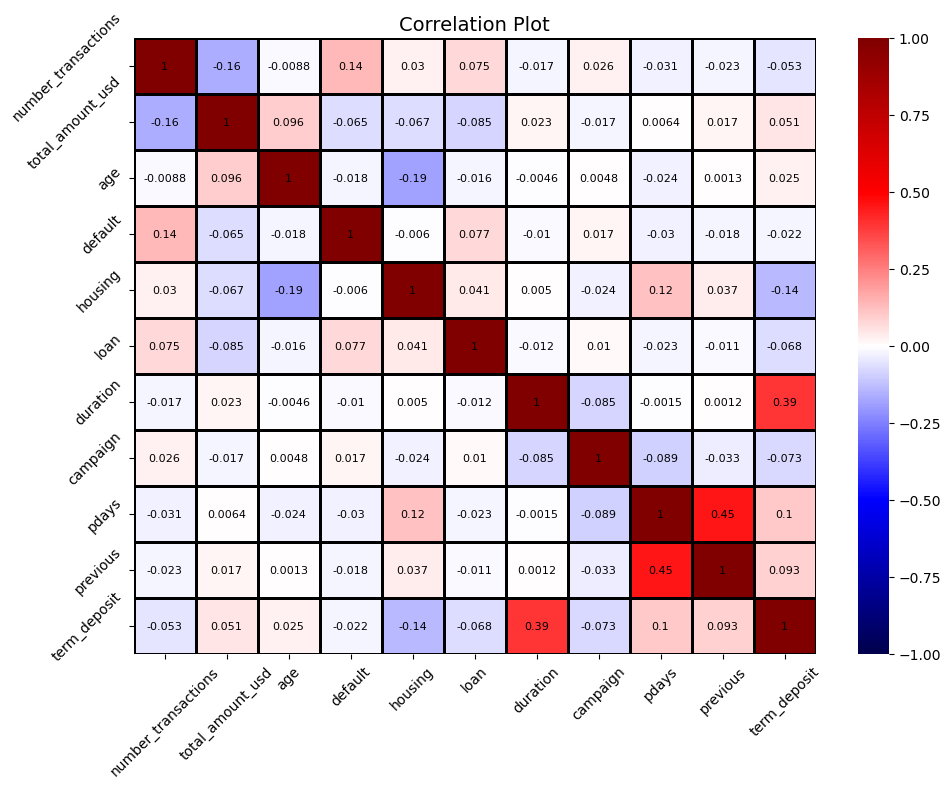

In [46]:
fig = plt.figure(figsize = (11, 8))

sns.heatmap(corr_matrix, 
            cmap = 'seismic', 
            linewidth = 0.75,
            linecolor = 'black',
            cbar = True,
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {'size': 8, 'color': 'black'})

plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot', size = 14);

## Identify missing values

In [47]:
users_cleaned_final.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

## Identify the percentage of missing values for each feature

In [48]:
percent_missing = users_cleaned_final.isnull().mean() 

percent_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

## Generate a missing value report

In [49]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = missing_value_df.rename(columns = {'index': 'column_name', 0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False)

    return missing_value_df

In [50]:
missing_value_df = missing_value_pct_df(users_cleaned_final)

missing_value_df

,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


## Remove features with a high percentage of missing values

In [51]:
# Threshold above which to drop feature.

threshold = 80

cols_to_drop = list(missing_value_df[missing_value_df['percent_missing'] > threshold]['column_name'])

print('Number of features to drop:',
      missing_value_df[missing_value_df['percent_missing'] > threshold].shape[0])

print(f'Features with missing values greater than {threshold}%:',
      cols_to_drop)

Number of features to drop: 1
Features with missing values greater than 80%: ['poutcome']


In [52]:
users_cleaned_final.drop(cols_to_drop, axis = 1, inplace = True)

In [53]:
# Confirm feature was dropped.

missing_value_df = missing_value_pct_df(users_cleaned_final)

missing_columns = list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:',
      len(missing_columns))

Number of features with missing values: 7


## Identify numerical data with missing values

In [54]:
dtypes = ['int64', 'float64']

numerical_columns = \
list(users_cleaned_final.select_dtypes(dtypes).columns)

print('Numerical features with missing values:',
      list(set(numerical_columns).intersection(missing_columns)))

Numerical features with missing values: ['total_amount_usd', 'number_transactions']


## Impute missing data values for total_amount_usd

In [55]:
# Find a sample user with missing value

sample_user = users_cleaned_final[users_cleaned_final['total_amount_usd']. \
                   isnull()].sample(1).user_id

sample_user

36472    608891d0-1dbb-4350-8e55-cfdf27d3c09f
Name: user_id, dtype: object

In [56]:
# Print mean of total_amount_usd.

print('Mean total_amount_usd:',
      round(users_cleaned_final['total_amount_usd'].mean(), 2))

# Impute missing values for total_amount_usd with mean.

users_cleaned_final['total_amount_usd']. \
fillna(round(users_cleaned_final['total_amount_usd'].mean(), 2), 
       inplace = True)

Mean total_amount_usd: 1369.42


In [57]:
users_cleaned_final[users_cleaned_final.user_id.isin(sample_user)]['total_amount_usd']

36472    1369.42
Name: total_amount_usd, dtype: float64

## Replace missing values for number_transactions with 0

In [58]:
users_cleaned_final['number_transactions']. fillna(0, inplace = True)

In [59]:
users_cleaned_final[users_cleaned_final.user_id.isin(sample_user)]['number_transactions']

36472    0.0
Name: number_transactions, dtype: float64

## Identify categorical data with missing values

In [60]:
categorical_columns = \
list(users_cleaned_final.select_dtypes(['object']).columns)

print('Categorical features with missing values:',
      list(set(categorical_columns).intersection(missing_columns)))

Categorical features with missing values: ['contact', 'education', 'device', 'job']


## Replace categorical missing values with `'Unknown'`

In [61]:
users_cleaned_final.device.fillna('Unknown', inplace = True)
users_cleaned_final.education.fillna('Unknown', inplace = True)
users_cleaned_final.contact.fillna('Unknown', inplace = True)
users_cleaned_final.job.fillna('Unknown', inplace = True)

In [62]:
users_cleaned_final.device.value_counts() # confirm

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

## Check if there are any other missing values

In [63]:
missing_value_df = missing_value_pct_df(users_cleaned_final)
missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:', len(missing_columns))
print('Features with missing values:', missing_columns)

Number of features with missing values: 1
Features with missing values: ['date_joined']


## Remove all rows where date_joined is missing

In [64]:
print('Number of users with corrupted data:', users_cleaned_final[users_cleaned_final['date_joined'].isnull()].shape[0])

Number of users with corrupted data: 30


In [65]:
# Remove corrupted data.

users_cleaned_final = users_cleaned_final[~users_cleaned_final['date_joined'].isnull()]

In [66]:
# Check to see if any corrupted rows remain.

print('Number of users with corrupted data:',
      users_cleaned_final[users_cleaned_final['date_joined']. \
                         isnull()].shape[0])

Number of users with corrupted data: 0


## Identify categorical features

In [67]:
categorical_columns = \
list(users_cleaned_final.select_dtypes(['object']).columns)

print('The number of categorical features:',
      len(categorical_columns))
print('The names of categorical features:',
      categorical_columns)

The number of categorical features: 6
The names of categorical features: ['user_id', 'job', 'marital', 'education', 'contact', 'device']


## One-hot encode job

In [68]:
users_cleaned_final.job.value_counts(dropna = True)

blue-collar      9725
management       9453
technician       7592
admin.           5168
services         4152
retired          2262
self-employed    1577
entrepreneur     1485
unemployed       1301
housemaid        1239
student           937
Unknown           288
Name: job, dtype: int64

In [69]:
# Create object for one-hot encoding.

encoder = ce.OneHotEncoder(cols = 'job',
                           return_df = True,
                           use_cat_names = True)

In [70]:
# Fit and transform data.

users_data_encoded = encoder.fit_transform(users_cleaned_final)

# Preview the data.

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile


In [71]:
list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device']

In [72]:
print('Shape of data before encoding:',
      users_cleaned_final.shape)
print('Shape of data after encoding:',
      users_data_encoded.shape)

Shape of data before encoding: (45179, 18)
Shape of data after encoding: (45179, 29)


## Dummy encode marital

In [73]:
marital_encoded = pd.get_dummies(data = users_data_encoded['marital'], drop_first = True)

marital_encoded 

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45206,1,0
45207,0,0
45208,1,0
45209,1,0


In [74]:
# Concatenate the new encoded columns.

users_data_encoded = pd.concat([users_data_encoded, marital_encoded], axis = 1)

# Drop the original variable.

users_data_encoded.drop(['marital'], axis = 1, inplace = True)

# Preview the data

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,Unknown,261,1,-1,0,False,1998-08-23,mobile,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,Unknown,151,1,-1,0,False,2008-07-15,desktop,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,Unknown,76,1,-1,0,False,2002-06-04,mobile,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,Unknown,92,1,-1,0,False,1995-06-29,tablet,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,Unknown,198,1,-1,0,False,1995-08-01,mobile,0,1


In [75]:
print('Shape of data after encoding:',
      users_data_encoded.shape)

list(users_data_encoded)

Shape of data after encoding: (45179, 30)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device',
 'married',
 'single']

## One-hot encode the remaining categorical variables

In [76]:
cols = ['education', 'contact', 'device']

encoder = ce.OneHotEncoder(cols = cols,
                           return_df = True,
                           use_cat_names = True)

In [77]:
# Fit and transform data.

users_data_encoded = encoder.fit_transform(users_data_encoded)

# Preview the data.

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,pdays,previous,term_deposit,date_joined,device_mobile,device_desktop,device_tablet,device_Unknown,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,-1,0,False,1998-08-23,1,0,0,0,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,-1,0,False,2008-07-15,0,1,0,0,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,-1,0,False,2002-06-04,1,0,0,0,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,-1,0,False,1995-06-29,0,0,1,0,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,-1,0,False,1995-08-01,1,0,0,0,0,1


In [78]:
print('Shape of data after encoding:',
      users_data_encoded.shape)

list(users_data_encoded)

Shape of data after encoding: (45179, 38)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single']

## Discretize age into bins

In [79]:
users_data_encoded.age.describe()

count    45179.000000
mean        40.935103
std         10.618499
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [80]:
# Define age bins and labels.

bins = [18, 25, 35, 45, 55, 65, 75, 110]
labels = ['18–24', '25–34', '35–44',
          '45–54', '55–64', '65–74', '75+']

# Perform binning using bin list.

users_data_encoded['age_group'] = pd.cut(users_data_encoded['age'], bins = bins, labels = labels, right = False)

# Map bins to integer values.
users_data_encoded['age_group_encoded'] = users_data_encoded['age_group'].cat.codes

In [81]:
# Verify correct binning.

age_vars = ['age_group_encoded', 'age_group', 'age']

users_data_encoded[age_vars].sample(10)

,age_group_encoded,age_group,age
35279,1,25–34,33
13532,2,35–44,44
41819,6,75+,81
34431,3,45–54,45
28120,1,25–34,30
3502,1,25–34,30
14484,2,35–44,39
25326,3,45–54,50
29027,3,45–54,47
2478,2,35–44,41


## Plot the new distribution of age

In [82]:
user_age_dist = users_data_encoded.age_group.value_counts()

user_age_dist

35–44    14524
25–34    14194
45–54     9951
55–64     4892
18–24      809
65–74      510
75+        299
Name: age_group, dtype: int64

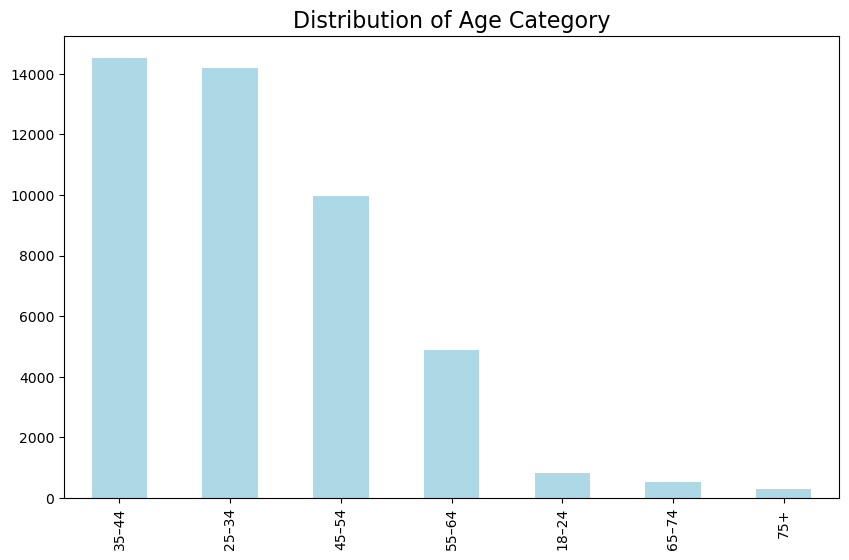

In [83]:
plt.figure(figsize = (10,6))
user_age_dist.plot(kind = 'bar', color = 'lightblue')
plt.title('Distribution of Age Category', fontsize = 16);

## Drop the age and age_group variables

In [84]:
users_data_encoded.drop(['age', 'age_group'],
                        axis = 1, inplace = True)

list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded']

## Create a month_joined variable from date_joined

In [85]:
users_data_encoded['month_joined'] = users_data_encoded.date_joined.dt.month

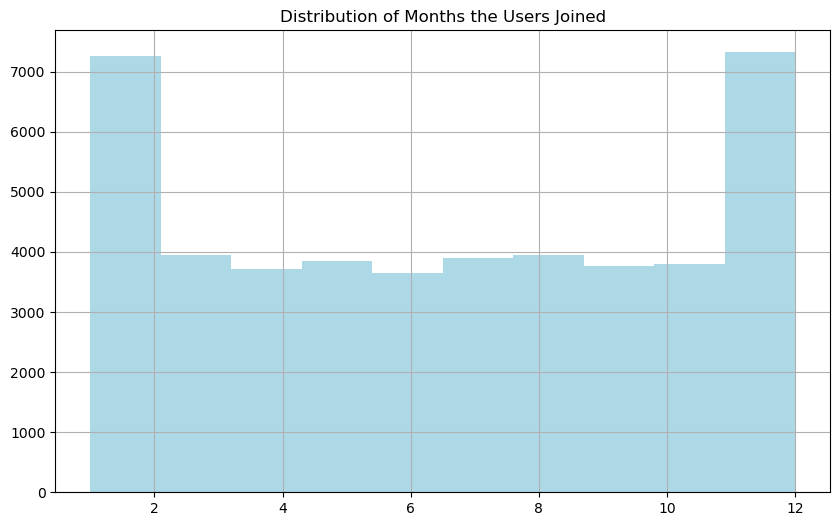

In [86]:
# View the distribution of data.
plt.figure(figsize = (10,6))
users_data_encoded['month_joined'].hist(color = 'lightblue')
plt.title('Distribution of Months the Users Joined');

In [87]:
users_data_encoded.drop(['date_joined'],
                        axis = 1, inplace = True)

list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

## Remove features with low variance

In [88]:
users_data_encoded.std()

number_transactions       3.749994
total_amount_usd       2704.291321
job_management            0.406767
job_technician            0.373908
job_entrepreneur          0.178296
job_blue-collar           0.411004
job_Unknown               0.079587
job_retired               0.218087
job_admin.                0.318287
job_services              0.288889
job_self-employed         0.183543
job_unemployed            0.167236
job_housemaid             0.163318
job_student               0.142513
education_tertiary        0.455691
education_secondary       0.499832
education_Unknown         0.198480
education_primary         0.358591
default                   0.133095
housing                   0.496878
loan                      0.366802
contact_Unknown           0.452851
contact_cellular          0.477695
contact_telephone         0.245250
duration                257.281109
campaign                  3.097836
pdays                   100.134967
previous                  2.303009
term_deposit        

In [89]:
# Define standard deviation threshold.

threshold = 0.1

# Identify features below threshold.

cols_to_drop = list(users_data_encoded.std()[users_data_encoded.std() < threshold].index.values)

print('Features with low standard deviation:',
      cols_to_drop)

Features with low standard deviation: ['job_Unknown', 'device_Unknown']


In [90]:
# Drop features below threshold.

users_data_interim = users_data_encoded.drop(cols_to_drop,
                                             axis = 1)

list(users_data_interim)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

## Drop highly correlated features

In [91]:
# Define correlation threshold.

threshold = 0.75

corr_matrix = users_data_encoded.corr().abs()
high_corr_var = np.where(corr_matrix >= threshold)
high_corr_var = [(corr_matrix.index[x],
                  corr_matrix.columns[y],
                  round(corr_matrix.iloc[x, y], 2))
                  for x, y in zip(*high_corr_var)
                  if x != y and x < y]


high_corr_var

[('contact_Unknown', 'contact_cellular', 0.86),
 ('device_mobile', 'device_desktop', 0.75),
 ('married', 'single', 0.77)]

In [92]:
# Tidy up the output.

record_collinear = pd.DataFrame(high_corr_var). \
rename(columns = {0: 'drop_feature',
                  1: 'corr_feature',
                  2: 'corr_values'})

record_collinear = record_collinear.sort_values(by = 'corr_values', ascending = False)

record_collinear = record_collinear.reset_index(drop = True)

record_collinear 

,drop_feature,corr_feature,corr_values
0,contact_Unknown,contact_cellular,0.86
1,married,single,0.77
2,device_mobile,device_desktop,0.75


In [93]:
cols_to_drop = list(record_collinear['drop_feature'])
print(cols_to_drop)

['contact_Unknown', 'married', 'device_mobile']


In [94]:
users_data_final = users_data_interim.drop(cols_to_drop,
                                           axis = 1)

list(users_data_final)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_desktop',
 'device_tablet',
 'single',
 'age_group_encoded',
 'month_joined']

## Filter by demographics data

In [95]:
users_data_demographics = \
users_data_final.filter(regex = 'education|job|age|single')

users_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


## Standardize the demographics data

In [96]:
users_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [97]:
scaler = StandardScaler()
        
scaler.fit(users_data_demographics)
users_data_scaled = scaler.transform(users_data_demographics)

print('New standard deviation: ', users_data_scaled.std())
print('New mean:               ', round(users_data_scaled.mean()))

New standard deviation:  1.0
New mean:                0


## Perform PCA to reduce the dimensionality of the demographics dataset

In [98]:
pca = PCA(n_components = 2, random_state = 1)

pca.fit(users_data_scaled)

reduced = pca.transform(users_data_scaled)

In [99]:
reduced_df = pd.DataFrame(reduced, columns = ['PCA1', 'PCA2'])

reduced_df

,PCA1,PCA2
0,2.557545,1.079613
1,-0.820505,-1.750581
2,-0.576607,-0.551404
3,-0.541647,1.593626
4,0.385598,-0.614768
...,...,...
45174,1.160485,0.073978
45175,-0.660738,4.371075
45176,-1.327676,2.367745
45177,-1.575612,1.040206


## Load the demographics dataset with PCA applied

In [100]:
reduced_df.to_pickle('users_data_demo_pca.pickle')

# Develop Classification models <a id="ML"></a>

Now we will start building machine learning models that will help make intelligent decisions about the data and business operations.The target variables is the term_deposit variable. The more effective a GCNB marketing campaign, the more term deposits the bank can get from its customers, and the more revenue it can generate.therefore, we will determine what customers are most likely to sign up for a term deposit, so that the marketing campaigns can prioritize those customers and seek out new customers who have the features that are most important for predicting a term deposit. 

## Explore the distribution of the target variable

In [101]:
users_data_final.term_deposit.value_counts(normalize = True)

False    0.883021
True     0.116979
Name: term_deposit, dtype: float64

## Split the data into target and features

In [102]:
target_data = users_data_final.term_deposit
features = users_data_final.drop(['user_id', 'term_deposit'], axis = 1)

## Split the data into train and test sets

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3)

In [104]:
print('Training data features: ', X_train.shape)
print('Training data target:   ', y_train.shape)

Training data features:  (31625, 31)
Training data target:    (31625,)


## Apply oversampling to the data

In [105]:
print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({False: 27908, True: 3717})


In [106]:
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({False: 27908, True: 27908})


## Check the distribution of the test data

In [107]:
# Test data should not be oversampled.

print('Test data features: ', X_test.shape)
print('Test data target:   ', y_test.shape)

Test data features:  (13554, 31)
Test data target:    (13554,)


In [108]:
Counter(y_test)

Counter({False: 11986, True: 1568})

## Normalize the data

In [109]:
norm = MinMaxScaler().fit(X_train_SMOTE)

In [110]:
X_train_norm = norm.transform(X_train_SMOTE)

print('Minimum: ', np.min(X_train_norm))
print('Maximum: ', np.max(X_train_norm))

Minimum:  0.0
Maximum:  1.0


## Train a logistic regression model

In [111]:
logreg = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 1.0)
logreg.fit(X_train_norm, y_train_SMOTE)

LogisticRegression(solver='newton-cg')

## Make predictions using the logistic regression model

In [112]:
logreg_y_pred = logreg.predict(X_test) 
print(Counter(logreg_y_pred))

Counter({True: 13481, False: 73})


## Obtain the logistic regression model's score

In [113]:
accuracy_score(y_test, logreg_y_pred)

0.12107127047366091

## Train a ***k***-nearest neighbor (***k***-NN) model

In [114]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train_SMOTE)

KNeighborsClassifier()

## Make predictions using the ***k***-NN model

In [115]:
knn_y_pred = knn.predict(X_test)
print(Counter(knn_y_pred))

Counter({True: 9468, False: 4086})


## Obtain the ***k***-NN model's score

In [116]:
accuracy_score(y_test, knn_y_pred)

0.32787369042349124

## Perform a grid search for optimal hyperparameters for K-NN

In [117]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_norm, y_train_SMOTE)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [118]:
grid_search.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [119]:
knn_y_pred = grid_search.predict(X_test)
accuracy_score(y_test, knn_y_pred)

0.8649845064187693

## Train a naïve Bayes model

In [120]:
gnb = GaussianNB() # Create the GaussianNB model
gnb.fit(X_train_SMOTE, y_train_SMOTE)

GaussianNB()

## Make predictions using the naïve Bayes model

In [121]:
gnb_y_pred = gnb.predict(X_test)
print(Counter(gnb_y_pred))

Counter({False: 9924, True: 3630})


## Obtain the naïve Bayes model's score

In [122]:
accuracy_score(y_test, gnb_y_pred)

0.7174265899365501

## Perform a grid search for optimal hyperparameters for naïve Bayes

In [123]:
# Define the parameter grid to search
param_grid = {'var_smoothing': [1e-6, 1e-5]}

# Create the GaussianNB model
gnb2 = GaussianNB()

grid_search = GridSearchCV(gnb2, param_grid, cv = 5, n_jobs=-1)

grid_search.fit(X_train_SMOTE, y_train_SMOTE)

gnb_y_pred = grid_search.predict(X_test)

accuracy_score(y_test, gnb_y_pred)

0.7746790615316512

## Train a decision tree model

In [124]:
clf_tree = DecisionTreeClassifier() # Create the DecisionTreeClassifier model
clf_tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

## Make predictions using the decision tree model

In [125]:
clf_tree_y_pred = clf_tree.predict(X_test)
print(Counter(clf_tree_y_pred))

Counter({False: 11644, True: 1910})


## Obtain the decision tree model's score

In [126]:
accuracy_score(y_test, clf_tree_y_pred)

0.8412276818651321

## Visualize the decision tree

In [127]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_22 <= 222.50
|   |--- feature_24 <= -0.50
|   |   |--- feature_23 <= 1.50
|   |   |   |--- feature_22 <= 115.50
|   |   |   |   |--- feature_22 <= 77.50
|   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |--- feature_29 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 909.88
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- feature_1 >  909.88
|   |   |   |   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- feature_26 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- feature_29 >  0.50
|   |   |   |   |   |   |   |   |--- feature_22 <= 64.50
|   |   |   |   |   |   |   |   |   |--- feature_30 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- trunc

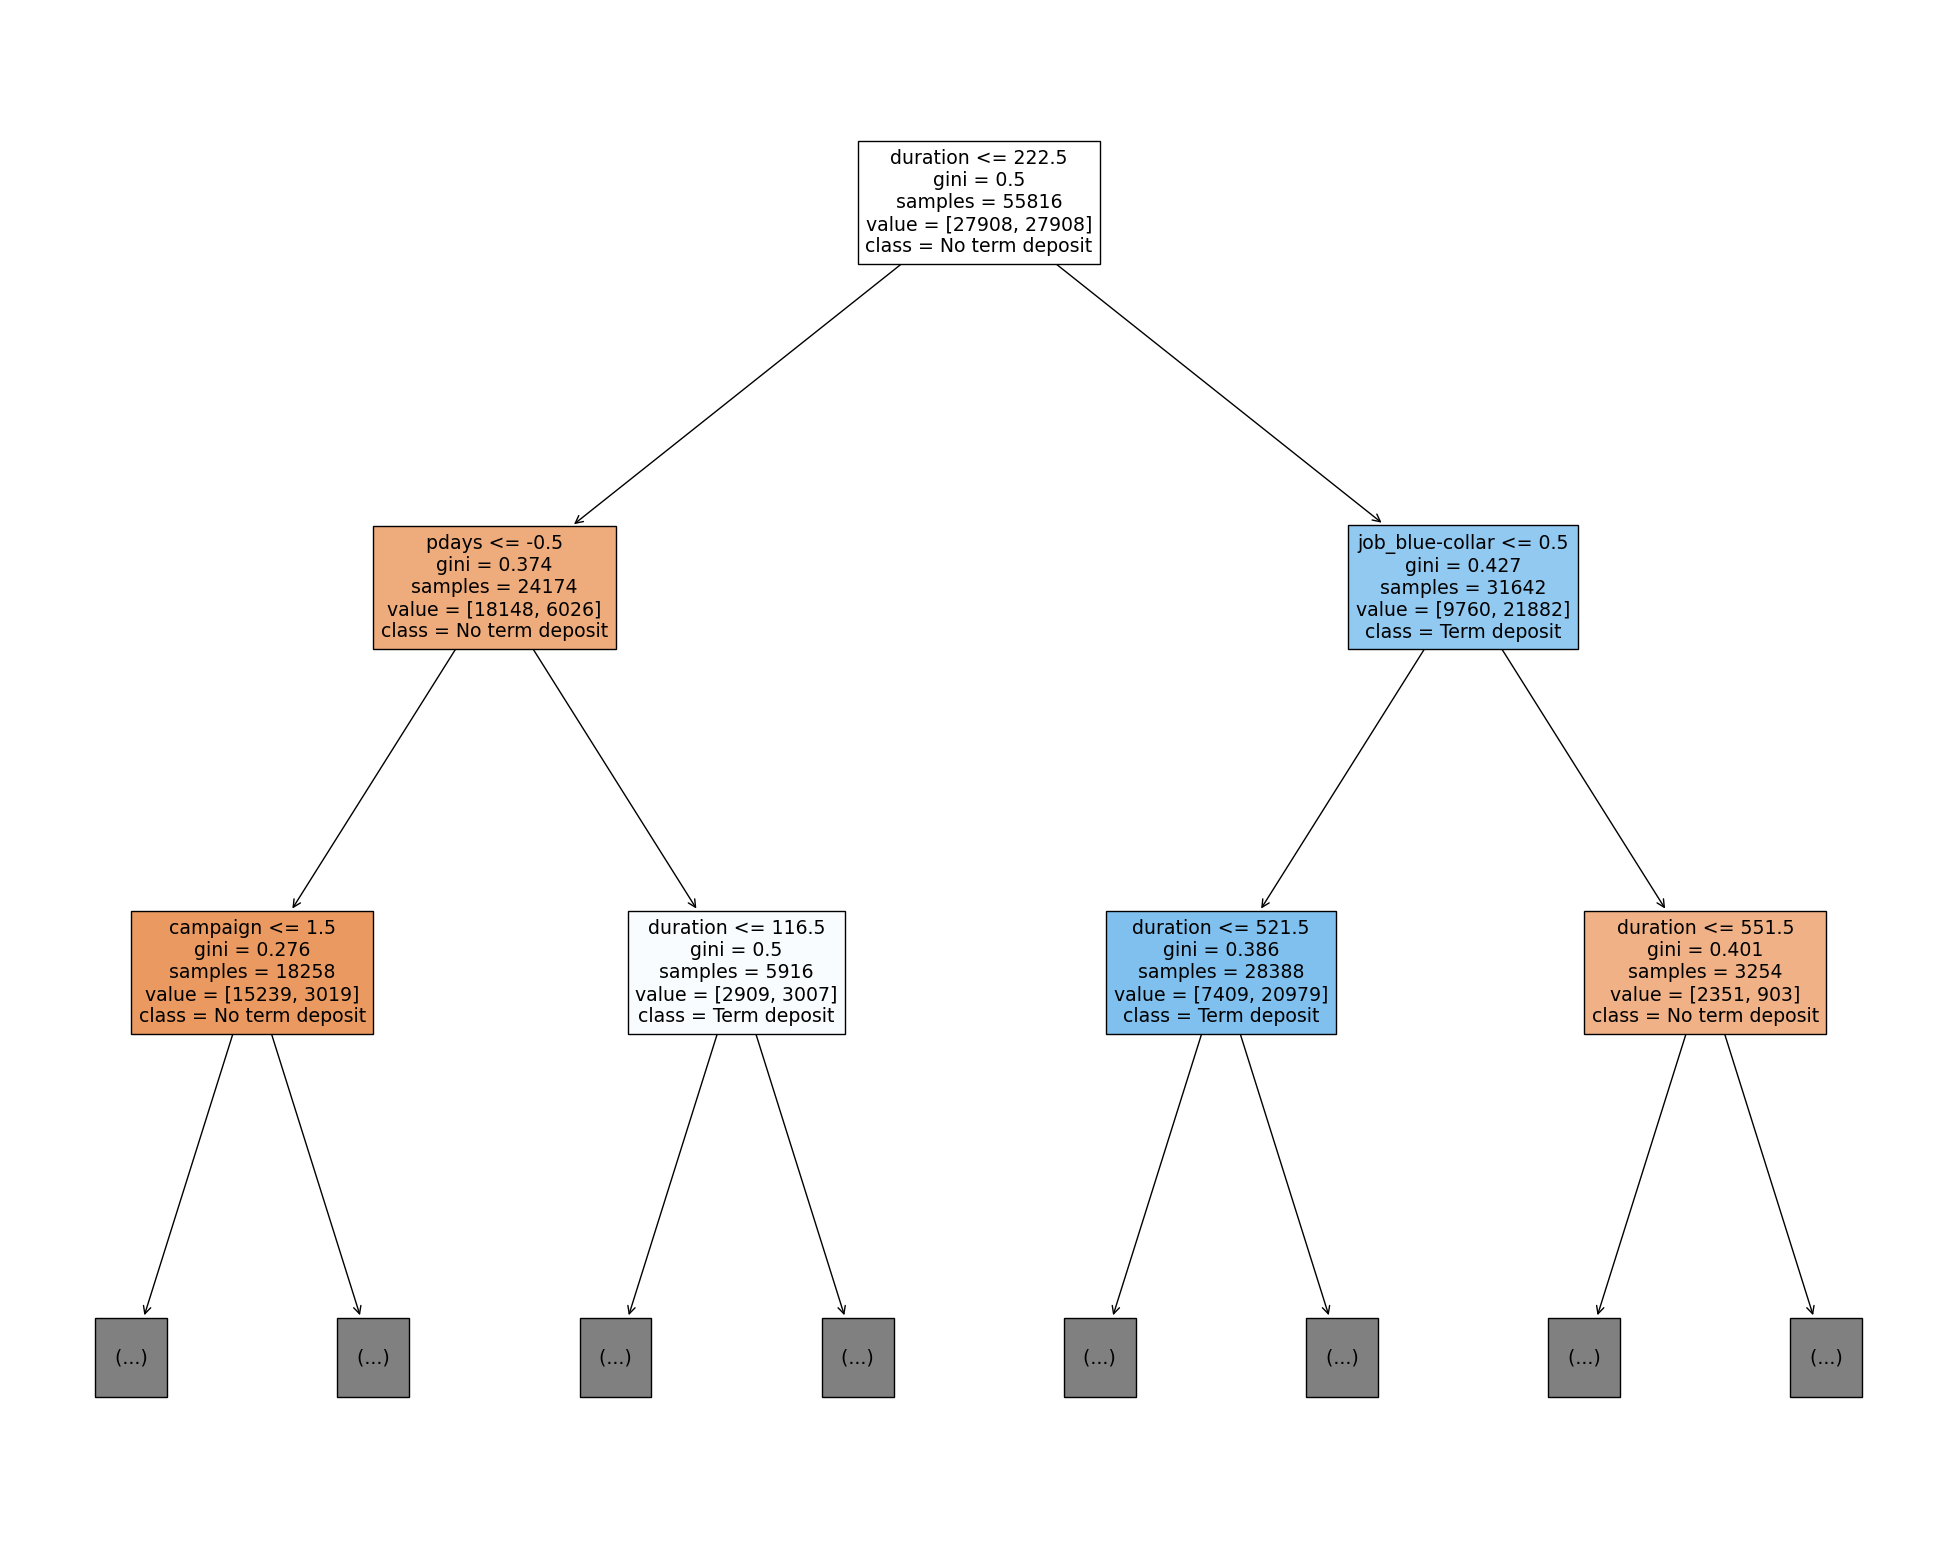

In [128]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   class_names = ['No term deposit', 'Term deposit'],
                   max_depth = 2,
                   filled = True)

## Perform a grid search for optimal hyperparameters for decision tree

In [129]:
# Define the parameter grid to search
param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5, 10]}

# Create the DecisionTreeClassifier model
clf_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf_tree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_SMOTE, y_train_SMOTE)


clf_tree_y_pred = grid_search.predict(X_test)
accuracy_score(y_test, clf_tree_y_pred)

0.8564999262210418

In [130]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

## Train a random forest model

In [131]:
rf = RandomForestClassifier()
rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

## Make predictions using the random forest model

In [132]:
rf_y_pred = rf.predict(X_test)
print(Counter(rf_y_pred))

Counter({False: 12497, True: 1057})


## Obtain the random forest model's score

In [133]:
accuracy_score(y_test, rf_y_pred)

0.8885199940976833

## Perform a grid search for optimal hyperparameters for random forest

In [134]:
param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gsc = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  n_jobs=-1,
                  scoring='accuracy',
                  verbose=2)

fitted_model = gsc.fit(X_train_SMOTE, y_train_SMOTE)
rf_y_pred = gsc.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [135]:
gsc.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [136]:
accuracy_score(y_test, rf_y_pred)

0.8885199940976833

## Train a gradient boosting model

In [137]:
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## Make predictions using the gradient boosting model

In [138]:
xgb_y_pred = xgb.predict(X_test)
print(Counter(xgb_y_pred))

Counter({0: 12323, 1: 1231})


## Obtain the gradient boosting model's score

In [139]:
accuracy_score(y_test, xgb_y_pred)

0.8904382470119522

## Perform a grid search for optimal hyperparameters for gradient boosting

In [140]:
model = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [5, 10, 15],
    'reg_alpha': [0.1, 0.5],
}

gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  n_jobs=-1,
                  scoring='accuracy',
                  verbose=2)

fitted_model = gs.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [141]:
xgb_y_pred = gs.predict(X_test)

In [142]:
accuracy_score(y_test, xgb_y_pred)

0.8908809207613988

## Compare evaluation metrics for each model

In [143]:
models = ['Logistic Regression', 'Naïve Bayes', 'k-NN',
          'Decision Tree', 'Random Forest', 'XGBoost']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

pred_list = ['logreg_y_pred', 'gnb_y_pred', 'knn_y_pred',
             'clf_tree_y_pred','rf_y_pred', 'xgb_y_pred']


scores = np.empty((0, 4))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[accuracy_score(y_test, globals()[i]),
                                  precision_score(y_test, globals()[i]),
                                  recall_score(y_test, globals()[i]),
                                  f1_score(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'F1', ascending = False)

,Accuracy,Precision,Recall,F1
XGBoost,0.8909,0.5374,0.4075,0.4635
Random Forest,0.8885,0.5268,0.3578,0.4261
Naïve Bayes,0.7747,0.2864,0.6352,0.3948
Decision Tree,0.8565,0.3791,0.3769,0.3780
Logistic Regression,0.1211,0.1163,1.0000,0.2084
k-NN,0.8650,0.2538,0.0861,0.1286


## Generate a confusion matrix

In [144]:
cm = confusion_matrix(y_test, xgb_y_pred, normalize='true') 

<Figure size 600x200 with 0 Axes>

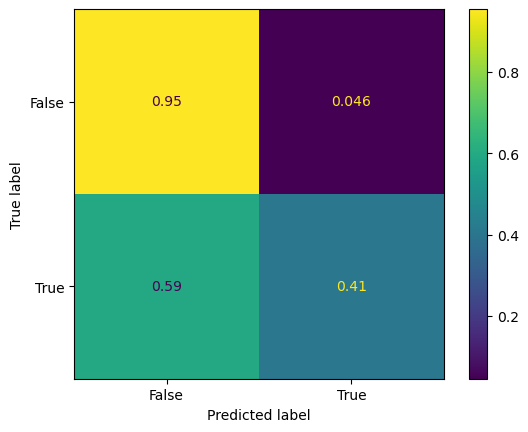

In [145]:
plt.figure(figsize = (6,2))

ConfusionMatrixDisplay(confusion_matrix = cm,
                      display_labels=xgb.classes_,
                      ).plot()

plt.show()

In [146]:
from sklearn import metrics 

print(metrics.classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94     11986
        True       0.54      0.41      0.46      1568

    accuracy                           0.89     13554
   macro avg       0.73      0.68      0.70     13554
weighted avg       0.88      0.89      0.88     13554



## Plot learning curves

In [151]:
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv = 5, 
                                                            scoring = 'accuracy', n_jobs = -1, shuffle = True,
                                                            train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

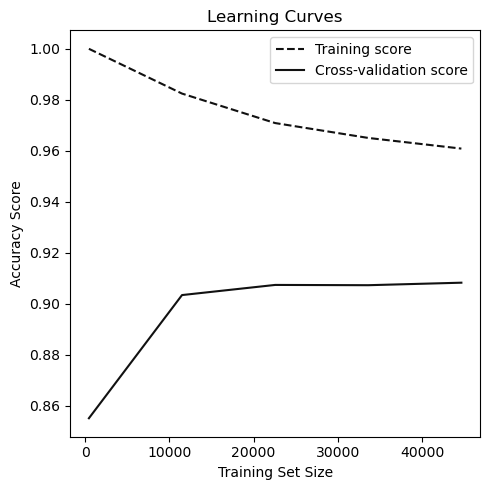

In [152]:
plot_learning_curves(xgb, X_train_SMOTE, y_train_SMOTE)

# Conclusion <a id="conc"></a>

After testing various classification models, we found that the XGBoost model is the most accurate and effective in predicting which customers are most likely to sign up for a term deposit. The XGBoost model outperformed other models in terms of accuracy, precision, recall, and F1-score. We recommend that GCNB use the XGBoost model to develop effective marketing campaigns and generate more revenue to achieve its business goals.

## Save the best model

In [153]:
pickle.dump(xgb, open('xgboost_classifier.pickle', 'wb'))